In [2]:
#numpy,pandas,matplotlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
df=pd.read_csv("unclean_customer_data.csv")

In [ ]:
print("Before Cleaning")
print(df.shape)
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]} ")


Before Cleaning
(10200, 6)
Rows: 10200, Columns: 6 


In [15]:
print("Before Cleaning")
# print(df.head(5))
# print(df.tail(5))
print(df.info())
# print(df.describe())

Before Cleaning
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10200 entries, 0 to 10199
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         10200 non-null  int64  
 1   Age                 9943 non-null   float64
 2   Annual_Income       10200 non-null  float64
 3   Spending_Score      10200 non-null  float64
 4   Purchase_Frequency  10200 non-null  int64  
 5   Transaction_Amount  9944 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 478.3 KB
None


In [17]:
print("MissingValues")
# df.isnull()
df.isnull().sum()

MissingValues


Customer_ID             0
Age                   257
Annual_Income           0
Spending_Score          0
Purchase_Frequency      0
Transaction_Amount    256
dtype: int64

In [18]:
df.fillna(0, inplace=True)

In [23]:
numeric_col=df.select_dtypes(include=["float64","int64"]).columns

for col in numeric_col:
    df[col].fillna(df[col].mean(),inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_11144\43906896.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(),inplace=True)


In [24]:
catgorical_colum=df.select_dtypes(include=["object"]).columns

for col in catgorical_colum:
    df[col].fillna(df[col].mode(),inplace=True)

In [25]:
df.isnull().sum()

Customer_ID           0
Age                   0
Annual_Income         0
Spending_Score        0
Purchase_Frequency    0
Transaction_Amount    0
dtype: int64

## Remove Duplicates

In [26]:
print("Num of Dup Rows:", df.duplicated().sum())

Num of Dup Rows: 0


In [27]:
print(df.shape)

(10000, 6)


In [28]:
df=df.drop_duplicates()

In [29]:
df.shape

(10000, 6)

In [30]:
numeric_col.shape

(6,)

Before Outliers


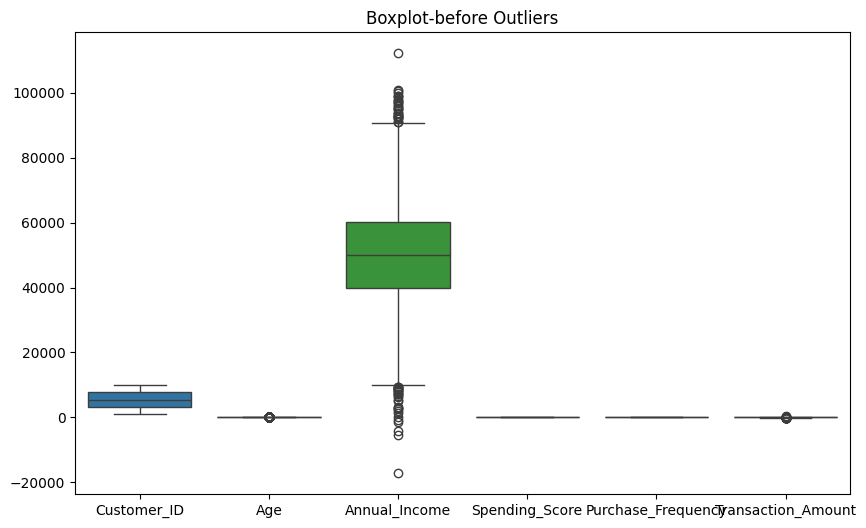

In [31]:
import seaborn as sns
zscore_num=numeric_col
print("Before Outliers")
plt.figure(figsize=(10,6))
sns.boxplot(data=df[zscore_num])
plt.title("Boxplot-before Outliers")
plt.show()


In [32]:
from scipy.stats import zscore
for col in zscore_num:
    zscore_num=df[(np.abs(zscore(df[col]))<1.8)]

In [33]:
print(zscore_num)

      Customer_ID   Age  Annual_Income  Spending_Score  Purchase_Frequency  \
0            8270  31.0   75851.592212       77.104268                  17   
1            1860  48.0   44460.183764       61.349076                  25   
2            6390  17.0   43677.755605       22.589956                   9   
3            6191  34.0   48666.812544       82.069525                   0   
4            6734  44.0   46080.334029       65.076915                   3   
...           ...   ...            ...             ...                 ...   
9994         5215  29.0   53689.566030       35.970910                  22   
9995         1581  36.0   52367.411507       56.135947                   8   
9996         4881  39.0   22129.594902       87.490917                  10   
9997         4909  40.0   70678.683758       78.373340                   2   
9999         1400  19.0   48401.664846       82.699566                  13   

      Transaction_Amount  
0             129.724190  
1        

After Outliers


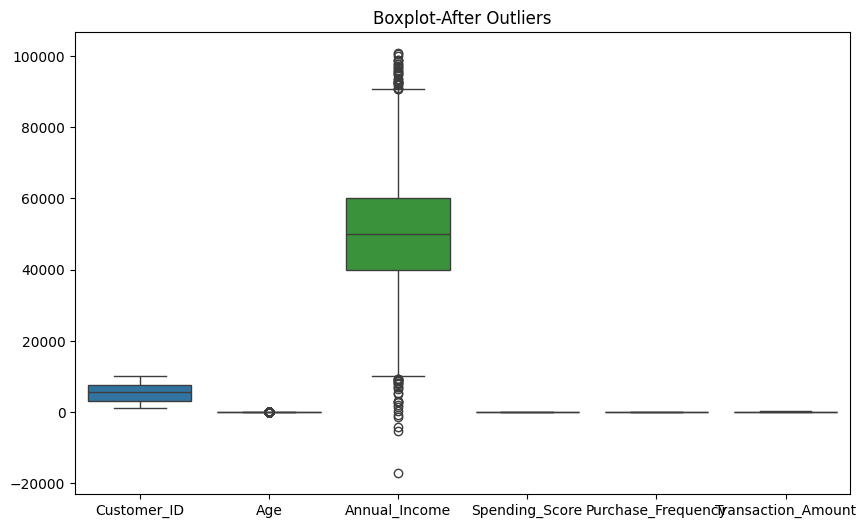

In [35]:
import seaborn as sns

print("After Outliers")
plt.figure(figsize=(10,6))
sns.boxplot(data=zscore_num)
plt.title("Boxplot-After Outliers")
plt.show()

In [ ]:
for col in numeric_col:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    print(f"Interquartile range for {col} is {iqr}")
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    df=df[(df[col]>=lower_bound)&(df[col]<=upper_bound)]

KeyError: 'Customer_ID'

After Outliers


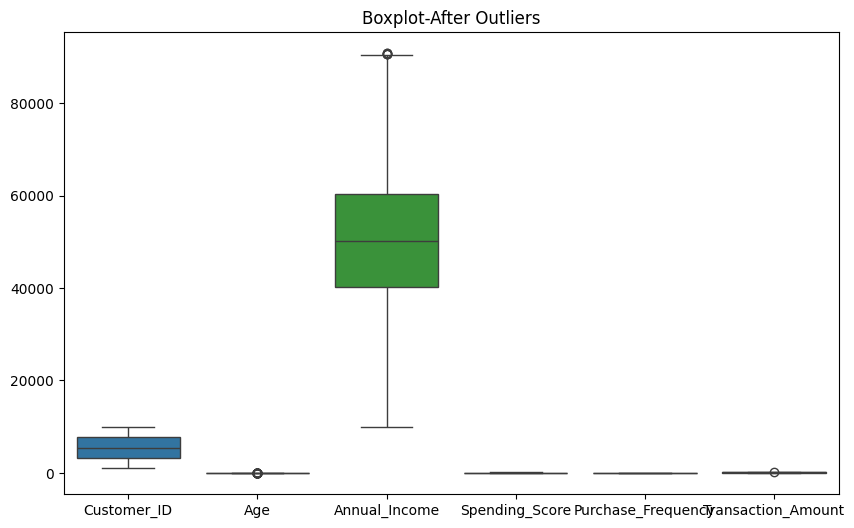

In [37]:
print("After Outliers")
plt.figure(figsize=(10,6))
sns.boxplot(data=df[numeric_col])
plt.title("Boxplot-After Outliers")
plt.show()

In [ ]:
df.shape

(9614, 6)

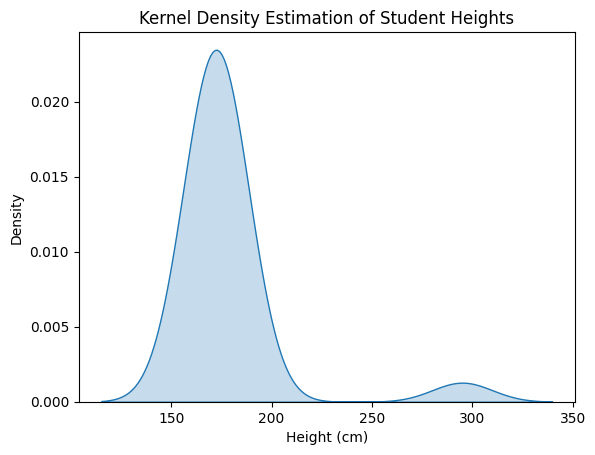

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Student heights data
heights = np.array([160, 165, 170, 172, 175, 168, 171, 173, 176, 178,
                    180, 163, 169, 174, 177, 182, 166, 179, 181, 167,295])

# Create the KDE plot
sns.kdeplot(heights, fill=True)  
# fill=True fills the area under the curve

# Add labels and title
plt.xlabel("Height (cm)")
plt.ylabel("Density")
plt.title("Kernel Density Estimation of Student Heights")

plt.show()

In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer

data = {
    'Age': [25, 30, None, 35, 28, None, 40],
    'Income': [50000, 60000, 55000, 70000, 48000, 62000, 80000]
}
df = pd.DataFrame(data)

knn_imputer = KNNImputer(n_neighbors=5)  # Using 5 nearest neighbors

df_imputed = pd.DataFrame(knn_imputer.fit_transform(df), columns=df.columns)

print("Original DataFrame:")
print(df)
print("\nImputed DataFrame:")
print(df_imputed)



Original DataFrame:
    Age  Income
0  25.0   50000
1  30.0   60000
2   NaN   55000
3  35.0   70000
4  28.0   48000
5   NaN   62000
6  40.0   80000

Imputed DataFrame:
    Age   Income
0  25.0  50000.0
1  30.0  60000.0
2  31.6  55000.0
3  35.0  70000.0
4  28.0  48000.0
5  31.6  62000.0
6  40.0  80000.0


In [ ]:
import pandas as pd
from fuzzywuzzy import process

data = {
    'name': ['John Doe', 'Jonathon Do', 'Jane Dough', 'John A. Doe', 'Jone Doe', 'David Smith']
}
df = pd.DataFrame(data)

query = "Jon Doe"

matches = process.extract(query, df['name'], limit=3)

print(f"Top 3 matches for '{query}':")
for match, score in matches:
    print(f"- '{match}' (Score: {score})")

Top 3 matches for 'Jon Doe':


C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


ValueError: too many values to unpack (expected 2)

In [ ]:
import pandas as pd
from rapidfuzz import process

data = {
    'name': ['John Doe', 'Jonathon Do', 'Jane Dough', 'John A. Doe', 'Jone Doe', 'David Smith']
}
df = pd.DataFrame(data)

query = "Jon Doe"

matches = process.extract(query, df['name'], limit=3)

print(f"Top 3 matches for '{query}':")
for match, score, _ in matches:  
    print(f"- '{match}' (Score: {score})")


Top 3 matches for 'Jon Doe':
- 'John Doe' (Score: 93.33333333333333)
- 'Jone Doe' (Score: 93.33333333333333)
- 'John A. Doe' (Score: 85.5)


In [39]:
import great_expectations as ge
import pandas as pd

# Sample DataFrame
data = {'age': [25, 30, None, 35, 28, None, 40]}
df = pd.DataFrame(data)

# Convert DataFrame to Great Expectations Dataset
dataset = ge.dataset.PandasDataset(df)

# Check if 'age' column has non-null values
print(dataset.expect_column_values_to_not_be_null("age"))


{
  "success": false,
  "expectation_config": {
    "expectation_type": "expect_column_values_to_not_be_null",
    "kwargs": {
      "column": "age",
      "result_format": "BASIC"
    },
    "meta": {}
  },
  "result": {
    "element_count": 7,
    "unexpected_count": 2,
    "unexpected_percent": 28.57142857142857,
    "unexpected_percent_total": 28.57142857142857,
    "partial_unexpected_list": []
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}


In [7]:
sales_df=pd.read_csv("Mob_Sales.csv")

In [8]:
print("Before Cleaning")
print(sales_df.shape)
print(f"Rows: {sales_df.shape[0]}, Columns: {sales_df.shape[1]} ")

Before Cleaning
(3114, 12)
Rows: 3114, Columns: 12 


In [9]:
print("Before Cleaning")
print(sales_df.head(5))
# print(sales_df.tail(5))
# print(sales_df.info())
# print(sales_df.describe())

Before Cleaning
    Brands        Models         Colors Memory Storage Camera  Rating  \
0  SAMSUNG  GALAXY M31S    Mirage Black   8 GB  128 GB    Yes     4.3   
1    Nokia           3.2          Steel   2 GB   16 GB    Yes     3.8   
2   realme           C2   Diamond Black   2 GB     NaN    Yes     4.4   
3  Infinix        Note 5       Ice Blue   4 GB   64 GB    Yes     4.2   
4    Apple    iPhone 11           Black    4GB   64 GB    Yes     4.6   

   Selling Price  Original Price                Mobile  Discount  \
0          19330           20999  SAMSUNG GALAXY M31S       1669   
1          10199           10199             Nokia 3.2         0   
2           6999            7999            realme C2       1000   
3          12999           12999        Infinix Note 5         0   
4          49900           49900      Apple iPhone 11          0   

   discount percentage  
0             7.947998  
1             0.000000  
2            12.501563  
3             0.000000  
4          

**Data Cleaning Tasks - Mob_Sales.csv**

**1. Handling Missing Values (Nulls)**

* **Task 1.1: Investigate "Memory" and "Storage" Columns**
    * 🔍 Identify rows with null values in "Memory" and "Storage".
    * 🤔 Determine the reason for the missing values.
    * 🛠️ Decide on a strategy:
        * Remove null rows (if appropriate).
        * Impute missing values (if possible).
        * Fill NaN with "Not Applicable" if it means that the device does not have memory or storage.
* **Task 1.2: Address "Rating" Column Nulls**
    * 🔍 Examine rows with null "Rating" values.
    * 🤔 Determine the cause of null ratings.
    * 🛠️ Decide on a strategy:
        * Impute with mean or median.
        * Fill with a placeholder (e.g., 0 or "Not Rated").
        * Remove the rows.

**2. Handling Duplicates**

* **Task 2.1: Check for Duplicate Rows**
    * 🔍 Identify and remove duplicate rows.
    * 🤔 Consider which columns should be used for duplicate detection.

**3. Addressing Outliers**

* **Task 3.1: Analyze "Selling Price" and "Original Price" for Outliers**
    * 📊 Use box plots or visualizations to find outliers.
    * 🔍 Investigate outliers (valid or errors?).
    * 🛠️ Decide on a strategy:
        * Correct errors.
        * Remove invalid outliers.
        * Leave the outliers if they are valid.
* **Task 3.2: Investigate "Discount" and "discount percentage" Outliers**
    * 🔍 Investigate negative discount values and high discount percentage values.
    * 🛠️ Correct the discount and discount percentage column.
* **Task 3.3: Analize the rating column:**
    * Investigate the minimum rating value of 2.3.
    * Determine if this is an error.

**4. Data Type Consistency and Formatting**

* **Task 4.1: Standardize "Memory" and "Storage" Values**
    * 📏 Ensure consistent formatting (e.g., all in GB).
    * 🛠️ Extract numerical values from entries like "Expandable Upto 32 GB".
* **Task 4.2: Clean "Brands" and "Models" Columns**
    * 🧹 Remove leading/trailing spaces.
    * 🔡 Standardize capitalization.

In [10]:
#Task1.1
print("\n Missing Values in Memory :", sales_df['Memory'].isnull().sum())
print("\n Missing Values in Storage :", sales_df['Storage'].isnull().sum())


 Missing Values in Memory : 43

 Missing Values in Storage : 39


In [11]:
sales_df["Memory"]=sales_df['Memory'].fillna('Not Applicable')
sales_df['Storage']=sales_df['Storage'].fillna('Not Applicable')

In [12]:
#Task1.1
print("\n Missing Values in Memory :", sales_df['Memory'].isnull().sum())
print("\n Missing Values in Storage :", sales_df['Storage'].isnull().sum())


 Missing Values in Memory : 0

 Missing Values in Storage : 0


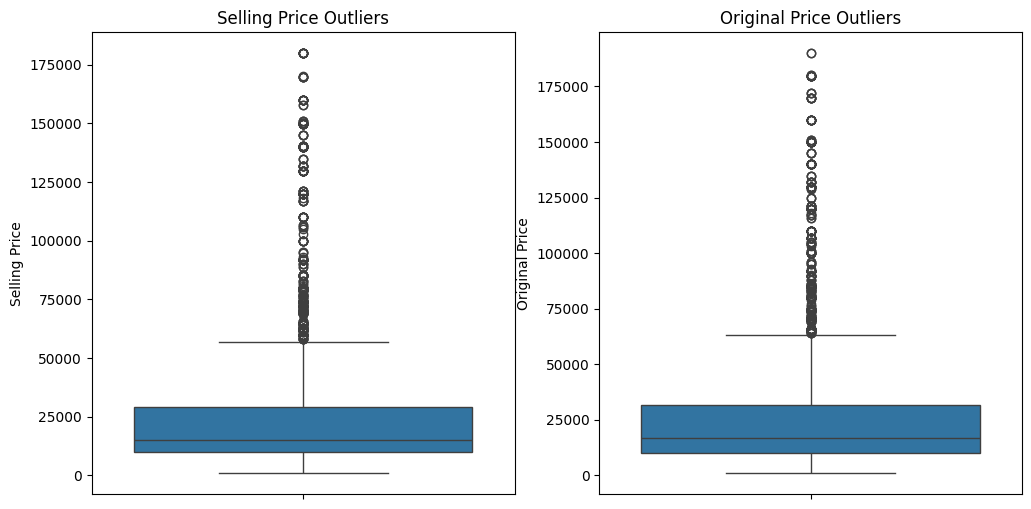

In [14]:
import seaborn as sns
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=sales_df['Selling Price'])
plt.title('Selling Price Outliers')

plt.subplot(1, 2, 2)
sns.boxplot(y=sales_df['Original Price'])
plt.title('Original Price Outliers')
plt.show()


**Outlier Identification and Column Examples**

When analyzing data for outliers, focus on continuous numerical columns. Here are examples:

**1. "Mob_Sales.csv" Dataset:**

* **`Selling Price` and `Original Price`:**
    * **Scenario:** Premium mobile phones.
    * **Identification:** Box plots, IQR calculations, sorting.
* **`Discount` and `discount percentage`:**
    * **Scenario:** Illogical discount values.
    * **Identification:** describe function, Box plots.

**2. Other Scenarios:**

* **E-commerce:**
    * **`Order Value`:** Bulk purchases.
    * **`Quantity Ordered`:** Promotional campaigns.
* **Healthcare:**
    * **`Heart Rate`:** Medical emergencies.
    * **`Body Temperature`:** Severe illness.
* **Financial Transactions:**
    * **`Transaction Amount`:** Fraud.
    * **`Transaction Frequency`:** Suspicious behavior.
* **Sensor Data:**
    * **`Air Quality Index (AQI)`:** Pollution events.
    * **`Humidity`:** Weather anomalies.

**Identification Methods:**

* Box plots
* Histograms
* IQR calculations
* Sorting
* Time series plots
* describe function
* Anomaly detection algorithms

In [15]:
# Task 3.2: Investigate "Discount" and "discount percentage" Outliers
print("\nDiscount Statistics:", sales_df['Discount'].describe())
print("\nDiscount Percentage Statistics:", sales_df['discount percentage'].describe())

# Correcting discount and discount percentage
# Identify rows where discount is negative
negative_discount_indices = sales_df[sales_df['Discount'] < 0].index
# Set all negative discount values to zero
sales_df.loc[negative_discount_indices, 'Discount'] = 0


Discount Statistics: count     3114.000000
mean      1896.847463
std       5337.126176
min      -8000.000000
25%          0.000000
50%          0.000000
75%       2000.000000
max      75000.000000
Name: Discount, dtype: float64

Discount Percentage Statistics: count    3114.000000
mean        6.086788
std        11.106776
min      -160.320641
25%         0.000000
50%         0.000000
75%         9.836388
max        70.610305
Name: discount percentage, dtype: float64


In [17]:
# recalculate the discount percentage
sales_df['discount percentage'] = (sales_df['Discount'] / sales_df['Original Price']) * 100

# Remove illogical discount percentage values.
sales_df = sales_df[(sales_df['discount percentage'] >= 0) & (sales_df['discount percentage'] <= 100)]

In [16]:
# Task 3.3: Analize the rating column:
print("\nRating Statistics:", sales_df['Rating'].describe())


Rating Statistics: count    2970.000000
mean        4.243098
std         0.271991
min         2.300000
25%         4.100000
50%         4.300000
75%         4.400000
max         5.000000
Name: Rating, dtype: float64


# No explicit outlier removal here as the ratings are within a reasonable range.


In [ ]:
# Task 4.1: Standardize "Memory" and "Storage" Values
def standardize_storage(value):
    if isinstance(value, str):
        if 'GB' in value:
            try:
                return int(value.split('GB')[0].strip())
            except ValueError:
                return value
        elif 'Expandable Upto' in value:
            try:
                return int(value.split('Upto')[1].split('GB')[0].strip())
            except (ValueError, IndexError):
                return value
        else:
            return value
    else:
        return value

sales_df['Memory'] = sales_df['Memory'].apply(standardize_storage)
sales_df['Storage'] = sales_df['Storage'].apply(standardize_storage)

In [ ]:
# Task 4.2: Clean "Brands" and "Models" Columns
sales_df['Brands'] = sales_df['Brands'].str.strip()
sales_df['Models'] = sales_df['Models'].str.strip()
sales_df['Brands'] = sales_df['Brands'].str.title()
sales_df['Models'] = sales_df['Models'].str.title()

# Display the cleaned data info
print("\nCleaned Data Info:")
print(sales_df.info())
print("\nCleaned Data Head:")
print(sales_df.head())
print("\nCleaned Data Describe:")
print(sales_df.describe())

In [ ]:
#numpy,pandas,matplotlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


print(np.__version__)
print(pd.__version__)
print(plt.__name__)


2.2.3
2.2.3
matplotlib.pyplot


In [3]:
Choclate=pd.read_csv("Chocolate Sales.csv")

**Chocolate Sales Data Cleaning & Visualization Tasks**

**1. Data Type Correction**

* **Task 1.1: Convert "Date" Column to Datetime**
    * 🛠️ Convert the "Date" column from object (string) to datetime format.
* **Task 1.2: Convert "Amount" Column to Numeric**
    * 🛠️ Remove currency symbols and commas from the "Amount" column and convert it to a numeric data type (float or int).

**2. Handling Missing Values (Nulls)**

* **Task 2.1: Check for Null Values**
    * 🔍 Verify if there are any null values in the dataset.

**3. Handling Duplicates**

* **Task 3.1: Check for Duplicate Rows**
    * 🔍 Identify and remove any duplicate rows in the dataset.

**4. Addressing Outliers**

* **Task 4.1: Analyze "Boxes Shipped" and "Amount" for Outliers**
    * 📊 Use box plots or other visualizations to identify potential outliers in the "Boxes Shipped" and "Amount" columns.
    * 🔍 Investigate the outliers (valid or errors?).
    * 🛠️ Decide if the outliers need to be removed or corrected.

**5. Sales Analysis**

* **Task 5.1: Sales by Country**
    * 📊 Create a bar chart to visualize the total sales amount for each country.
* **Task 5.2: Sales by Product**
    * 📊 Create a bar chart to visualize the total sales amount for each product.
* **Task 5.3: Sales Over Time**
    * 📊 Create a line chart to visualize the sales trend over time.

**6. Distribution Analysis**

* **Task 6.1: Distribution of Boxes Shipped**
    * 📊 Create a histogram or box plot to visualize the distribution of "Boxes Shipped."
* **Task 6.2: Distribution of Sales Amount**
    * 📊 Create a histogram or box plot to visualize the distribution of "Amount."

**7. Sales Person Analysis**

* **Task 7.1: Sales by Sales Person**
    * 📊 Create a bar chart to visualize the total sales amount for each sales person.

In [4]:
print("Before Cleaning")
# print(Choclate.shape)
# print(f"Rows: {Choclate.shape[0]}, Columns: {Choclate.shape[1]} ")
# print("Before Cleaning")
# print(Choclate.head(5))
print(Choclate.tail(5))
# print(Choclate.info())
print(Choclate.describe())


Before Cleaning
          Sales Person    Country              Product       Date   Amount  \
1089  Karlen McCaffrey  Australia  Spicy Special Slims  17-May-22  $4,410    
1090    Jehu Rudeforth        USA           White Choc  07-Jun-22  $6,559    
1091      Ches Bonnell     Canada  Organic Choco Syrup  26-Jul-22    $574    
1092    Dotty Strutley      India              Eclairs  28-Jul-22  $2,086    
1093  Karlen McCaffrey      India       70% Dark Bites  23-May-22  $5,075    

      Boxes Shipped  
1089            323  
1090            119  
1091            217  
1092            384  
1093            344  
       Boxes Shipped
count    1094.000000
mean      161.797989
std       121.544145
min         1.000000
25%        70.000000
50%       135.000000
75%       228.750000
max       709.000000


**Chocolate Sales Data Cleaning & Visualization Tasks**

**1. Data Type Correction**

* **Task 1.1: Convert "Date" Column to Datetime**
    * 🛠️ Convert the "Date" column from object (string) to datetime format.
* **Task 1.2: Convert "Amount" Column to Numeric**
    * 🛠️ Remove currency symbols and commas from the "Amount" column and convert it to a numeric data type (float or int).

In [5]:
Choclate['Date']=pd.to_datetime(Choclate['Date'],format='%d-%b-%y')

In [6]:
Choclate.head(10)

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,"$13,685",184
5,Van Tuxwell,India,Smooth Sliky Salty,2022-06-06,"$5,376",38
6,Oby Sorrel,UK,99% Dark & Pure,2022-01-25,"$13,685",176
7,Gunar Cockshoot,Australia,After Nines,2022-03-24,"$3,080",73
8,Jehu Rudeforth,New Zealand,50% Dark Bites,2022-04-20,"$3,990",59
9,Brien Boise,Australia,99% Dark & Pure,2022-07-04,"$2,835",102


In [7]:
Choclate['Amount']=Choclate["Amount"].str.replace('$','').str.replace(',','').astype(float)

In [8]:
Choclate.head(10)
Choclate.dtypes

Sales Person             object
Country                  object
Product                  object
Date             datetime64[ns]
Amount                  float64
Boxes Shipped             int64
dtype: object

**2. Handling Missing Values (Nulls)**

* **Task 2.1: Check for Null Values**
    * 🔍 Verify if there are any null values in the dataset.

**3. Handling Duplicates**

* **Task 3.1: Check for Duplicate Rows**
    * 🔍 Identify and remove any duplicate rows in the dataset.


In [9]:
Choclate.isnull().sum()

Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
dtype: int64

In [10]:
# print("DUplicated Rows COunt")
Choclate.duplicated().sum()
Choclate=Choclate.drop_duplicates()

In [11]:
Choclate.shape

(1094, 6)

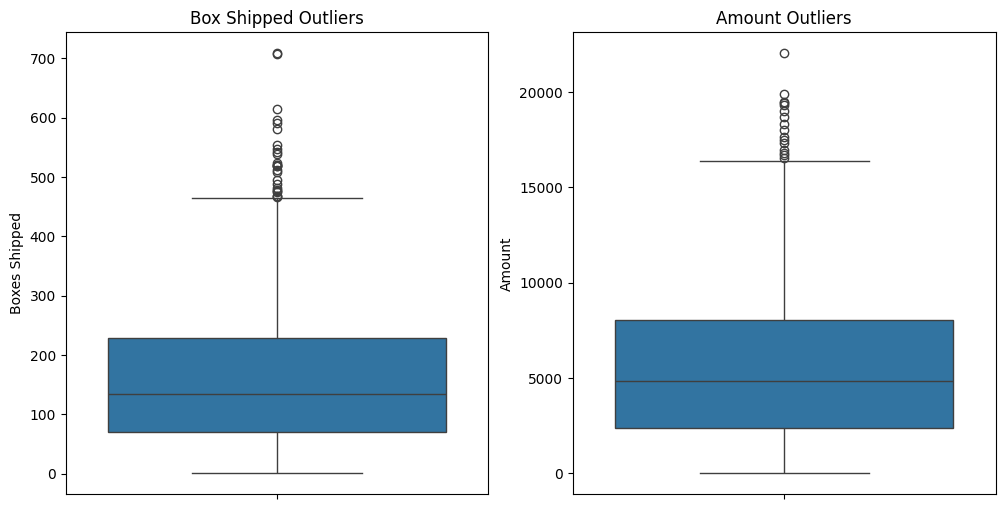

In [12]:
import seaborn as sns
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(y=Choclate['Boxes Shipped'])
plt.title("Box Shipped Outliers")

plt.subplot(1,2,2)
sns.boxplot(y=Choclate['Amount'])
plt.title("Amount Outliers")
plt.show()

In [13]:
Choclate.describe()

,Date,Amount,Boxes Shipped
count,1094,1094.000000,1094.000000
mean,2022-05-03 09:04:56.160877568,5652.308044,161.797989
min,2022-01-03 00:00:00,7.000000,1.000000
25%,2022-03-02 00:00:00,2390.500000,70.000000
50%,2022-05-11 00:00:00,4868.500000,135.000000
75%,2022-07-04 00:00:00,8027.250000,228.750000
max,2022-08-31 00:00:00,22050.000000,709.000000
std,NaN,4102.442014,121.544145


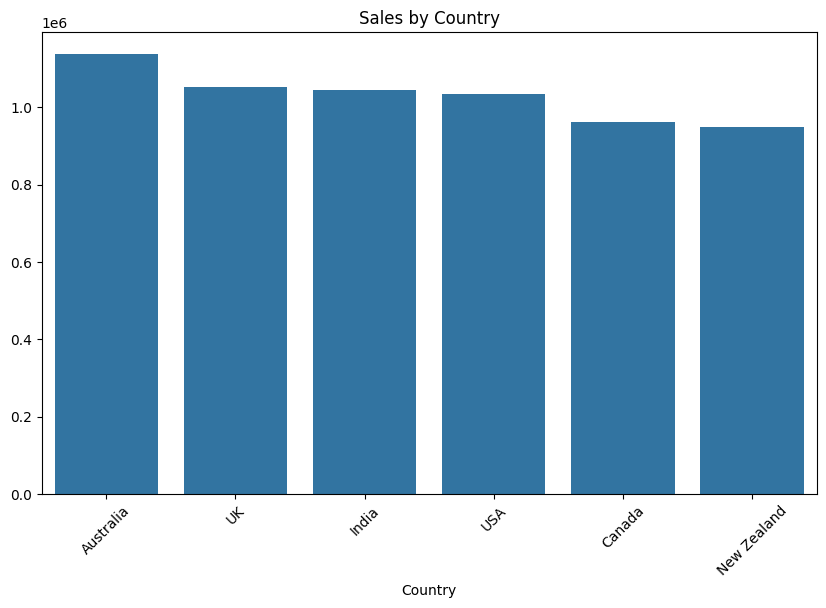

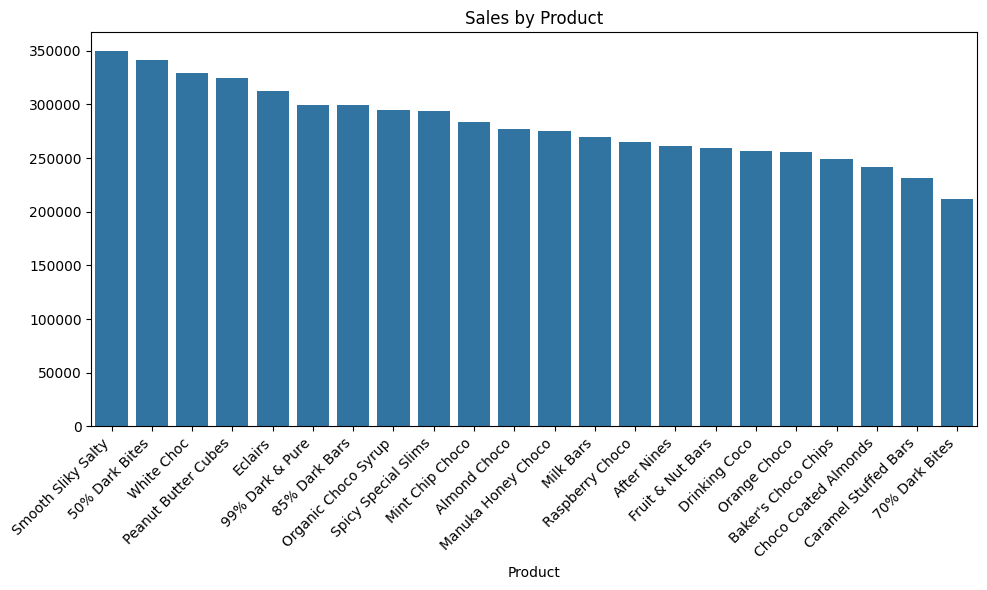

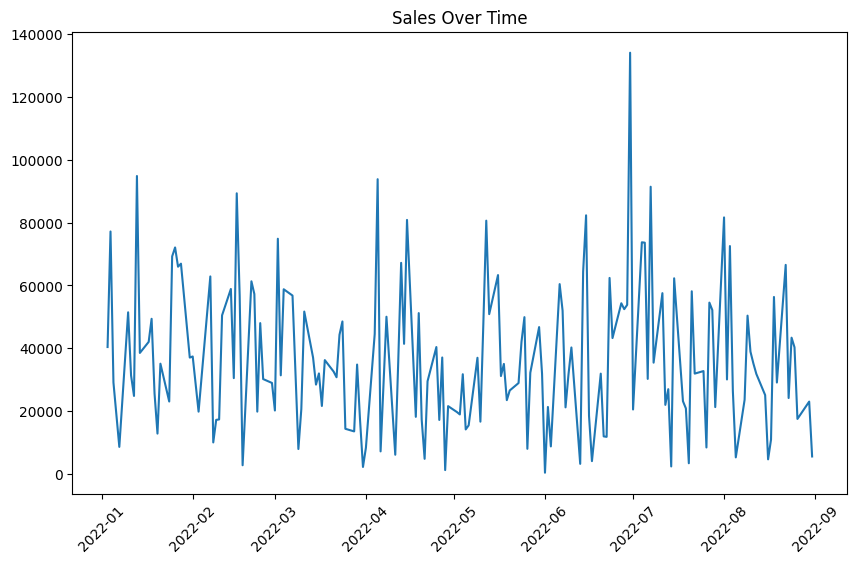

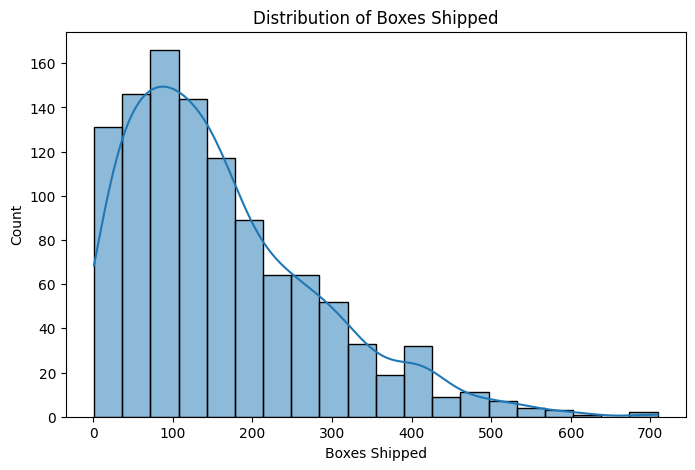

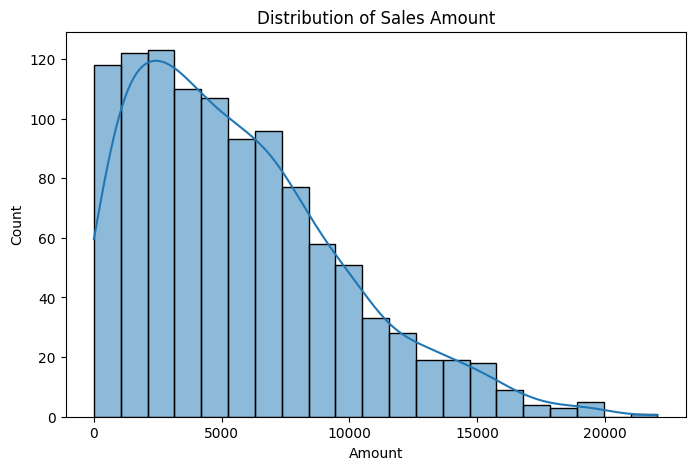

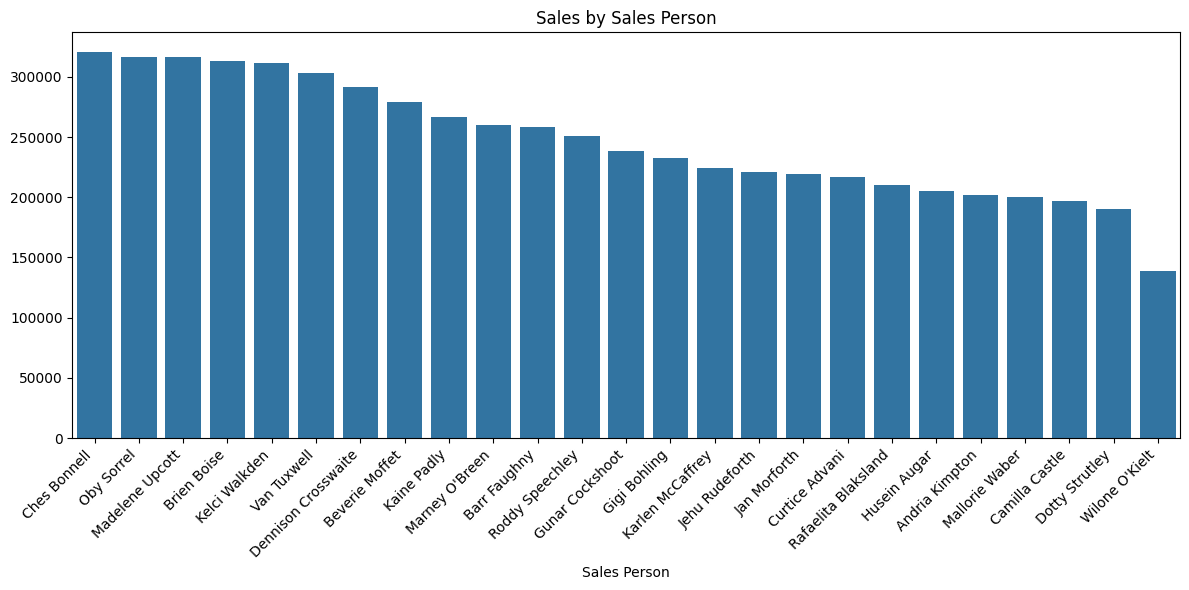

In [16]:
sales_by_country = Choclate.groupby('Country')['Amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_country.index, y=sales_by_country.values)
plt.title('Sales by Country')
plt.xticks(rotation=45)
plt.show()

sales_by_product = Choclate.groupby('Product')['Amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_product.index, y=sales_by_product.values)
plt.title('Sales by Product')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

sales_over_time = Choclate.groupby('Date')['Amount'].sum()
plt.figure(figsize=(10, 6))
plt.plot(sales_over_time.index, sales_over_time.values)
plt.title('Sales Over Time')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(Choclate['Boxes Shipped'], kde=True,bins=20)
plt.title('Distribution of Boxes Shipped')
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(Choclate['Amount'], kde=True)
plt.title('Distribution of Sales Amount')
plt.show()

sales_by_person = Choclate.groupby('Sales Person')['Amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=sales_by_person.index, y=sales_by_person.values)
plt.title('Sales by Sales Person')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [8]:
import pandas as pd
a=[1,2,3]
b=[4,5,6,8]

s1=pd.Series(a)
s2=pd.Series(b)

pd.concat([s1,s2])

0    1
1    2
2    3
0    4
1    5
2    6
3    8
dtype: int64

In [13]:
import numpy as np
a = np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])
print(a.shape)
print(a[0][1][1])

(2, 2, 2)
4
